# Background

A hospital develops sales organically as well as through marketing campaigns.  The development and executive teams at the hospital would like to know which marketeing campaigns and strategies are most effective, and whether each strategy is valid for different client types at small, medium, and large facilities.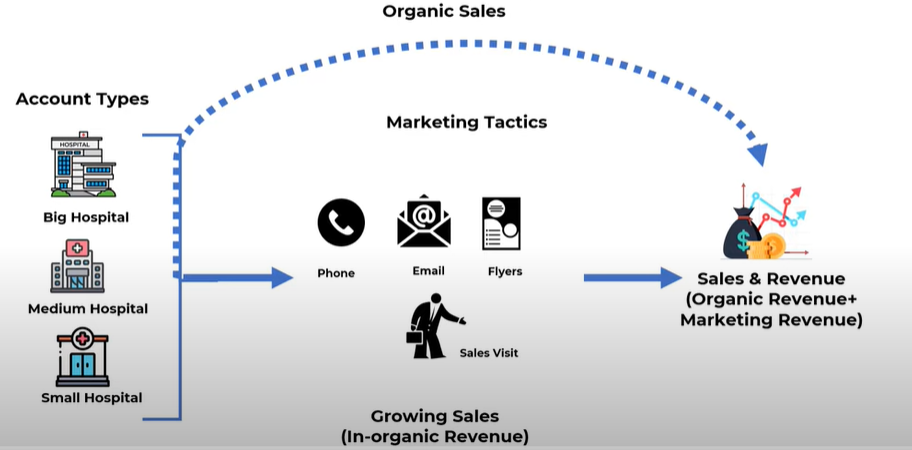

# Objective

There are two questions at the heart of this analysis
- What is the return on investment(ROI) of each marketing strategy?

- Is the same strategy valid for all the different client types ?

# Importing Packages and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:
data=pd.read_csv(r"C:\Users\natee\OneDrive\Desktop\Pandas Datasets\Campaign-Data.csv")
data.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

In [3]:
data.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [4]:
## Creation of Additional Features 
data['Calendardate']=pd.to_datetime(data['Calendardate'])
data['Calendar_Month']=data['Calendardate'].dt.month
data['Calendar_Year']=data['Calendardate'].dt.year

C:\Users\natee\AppData\Local\Temp\ipykernel_36628\470255435.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Calendardate']=pd.to_datetime(data['Calendardate'])


In [5]:
data['Client Type'].value_counts(normalize=True)

Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: Client Type, dtype: float64

In [6]:
pd.crosstab(data['Number of Competition'],data['Client Type'],margins=True,normalize='columns')

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


In [7]:
data.groupby('Number of Competition').mean('numeric_only')

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Number of Competition,,,,,,,,,,,,,,,
High,1456.935484,75.080645,1003.0,2.974789e+07,213.127016,105398.938508,994046.717540,45198.036895,146945.564516,2.685333e+06,1.786754e+06,72172.379032,8452.620968,10.5,2015.0
Low,1456.935484,75.080645,1003.0,1.445570e+07,103.132258,150862.165766,623692.979839,26693.304194,128219.758065,1.890916e+06,1.883634e+06,70481.854839,15864.919355,5.7,2014.4


In [8]:
data.groupby('Client Type').mean('numeric_only')

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Client Type,,,,,,,,,,,,,,,
Large Facility,1380.842105,71.578947,1003.0,1.999880e+07,143.098684,142273.609649,8.192056e+05,45595.436623,133667.763158,2.034013e+06,2.017039e+06,119287.280702,16266.447368,6.5,2014.5
Medium Facility,3940.761905,202.857143,1003.0,4.075997e+07,290.583333,437217.097817,1.552603e+06,49176.847619,398645.833333,4.822783e+06,4.698646e+06,85104.166667,33273.809524,6.5,2014.5
Private Facility,400.727273,20.454545,1003.0,5.030246e+06,35.784091,5183.715152,2.272919e+05,5522.470455,1221.590909,6.376705e+05,4.434375e+05,3664.772727,12215.909091,6.5,2014.5
Small Facility,422.514286,21.285714,1003.0,1.637759e+06,11.689286,11975.986310,9.120875e+04,0.000000,8062.500000,7.617143e+05,3.727946e+05,4223.214286,1535.714286,6.5,2014.5


In [9]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(data[['Amount Collected',
'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis.columns=['Impacting Variable','Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variable']!='Amount Collected']
correlation_analysis=correlation_analysis.sort_values('Degree of Linear Impact (Correlation)',ascending=False)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

C:\Users\natee\AppData\Local\Temp\ipykernel_36628\2022042498.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)


,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


In [10]:
# Import seaborn library
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(data.groupby('Client Type')[['Amount Collected',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis=correlation_analysis.sort_values(['Client Type','Amount Collected'],ascending=False)
correlation_analysis.columns=['Acc Type','Variable Impact on Sales','Impact']
correlation_analysis=correlation_analysis[correlation_analysis['Variable Impact on Sales']!='Amount Collected'].reset_index(drop=True)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

C:\Users\natee\AppData\Local\Temp\ipykernel_36628\3752512781.py:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)


,Acc Type,Variable Impact on Sales,Impact
0,Small Facility,Sales Contact 2,0.22
1,Small Facility,Sales Contact 3,0.07
2,Small Facility,Campaign (Email),0.06
3,Small Facility,Campaign (Flyer),0.04
4,Small Facility,Sales Contact 4,0.02
5,Small Facility,Sales Contact 5,0.00
6,Small Facility,Sales Contact 1,-0.02
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.57
9,Private Facility,Campaign (Flyer),0.28


In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.columns=[mystring.replace(" ", "_") for mystring in data.columns]
data.columns=[mystring.replace("(", "") for mystring in data.columns]
data.columns=[mystring.replace(")", "") for mystring in data.columns]
results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5',data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:27:08   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

In [12]:
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]

In [13]:
df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef']]
df

,index,coef
0,Intercept,1.481000e+06
2,Campaign_Flyer,3.337600e+00
4,Sales_Contact_1,4.236800e+00
5,Sales_Contact_2,3.638200e+00
6,Sales_Contact_3,2.343200e+00
7,Sales_Contact_4,1.094780e+01


In [14]:
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(data['Client_Type']))):
    temp_data=data[data['Client_Type']==acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=acctype
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']
    print(acctype)
    consolidated_summary=consolidated_summary.append(df)
    print(df)
    #print(results.summary())

Medium Facility
          Variable  Coefficent (Impact)     Account Type
2   Campaign_Flyer               4.1059  Medium Facility
5  Sales_Contact_2               3.5778  Medium Facility
4  Sales_Contact_1               3.1365  Medium Facility
6  Sales_Contact_3               2.1174  Medium Facility
Small Facility 
          Variable  Coefficent (Impact)     Account Type
5  Sales_Contact_2         8.101000e-01  Small Facility 
3   Campaign_Phone        -7.137000e-07  Small Facility 
Private Facility
          Variable  Coefficent (Impact)      Account Type
5  Sales_Contact_2               6.6223  Private Facility
Large Facility 
          Variable  Coefficent (Impact)     Account Type
4  Sales_Contact_1              11.6731  Large Facility 
7  Sales_Contact_4              10.6145  Large Facility 
5  Sales_Contact_2               4.0031  Large Facility 
2   Campaign_Flyer               2.7204  Large Facility 
6  Sales_Contact_3               2.0316  Large Facility 
3   Campaign_Phone   

C:\Users\natee\AppData\Local\Temp\ipykernel_36628\2257959315.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary=consolidated_summary.append(df)
C:\Users\natee\AppData\Local\Temp\ipykernel_36628\2257959315.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary=consolidated_summary.append(df)
C:\Users\natee\AppData\Local\Temp\ipykernel_36628\2257959315.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary=consolidated_summary.append(df)
C:\Users\natee\AppData\Local\Temp\ipykernel_36628\2257959315.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary=consolid

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(data['Client_Type']))):
    print(acctype)
    temp_data=data[data['Client_Type']==acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=acctype
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']
    consolidated_summary=consolidated_summary.append(df)
    print(results.summary())

Medium Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     48.00
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           4.13e-57
Time:                        13:27:09   Log-Likelihood:                -9461.9
No. Observations:                 504   AIC:                         1.894e+04
Df Residuals:                     495   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.682e+06

C:\Users\natee\AppData\Local\Temp\ipykernel_36628\3157098980.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary=consolidated_summary.append(df)


                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6.829
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           6.63e-08
Time:                        13:27:09   Log-Likelihood:                -14125.
No. Observations:                 840   AIC:                         2.827e+04
Df Residuals:                     832   BIC:                         2.830e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8.789e+05   2.07e+05     

C:\Users\natee\AppData\Local\Temp\ipykernel_36628\3157098980.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary=consolidated_summary.append(df)
C:\Users\natee\AppData\Local\Temp\ipykernel_36628\3157098980.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary=consolidated_summary.append(df)
C:\Users\natee\AppData\Local\Temp\ipykernel_36628\3157098980.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary=consolidated_summary.append(df)


In [16]:
consolidated_summary

,Variable,Coefficent (Impact),Account Type
2,Campaign_Flyer,4.105900e+00,Medium Facility
5,Sales_Contact_2,3.577800e+00,Medium Facility
4,Sales_Contact_1,3.136500e+00,Medium Facility
6,Sales_Contact_3,2.117400e+00,Medium Facility
5,Sales_Contact_2,8.101000e-01,Small Facility
3,Campaign_Phone,-7.137000e-07,Small Facility
5,Sales_Contact_2,6.622300e+00,Private Facility
4,Sales_Contact_1,1.167310e+01,Large Facility
7,Sales_Contact_4,1.061450e+01,Large Facility
5,Sales_Contact_2,4.003100e+00,Large Facility


In [17]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',inplace=True,axis=1)

In [18]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary['Return on Investment']= consolidated_summary['Return on Investment'].apply(lambda x: round(x,1))
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Campaign_Flyer,4.100000,Medium Facility
1,Sales_Contact_2,3.600000,Medium Facility
2,Sales_Contact_1,3.100000,Medium Facility
3,Sales_Contact_3,2.100000,Medium Facility
4,Sales_Contact_2,0.800000,Small Facility
5,Campaign_Phone,-0.000000,Small Facility
6,Sales_Contact_2,6.600000,Private Facility
7,Sales_Contact_1,11.700000,Large Facility
8,Sales_Contact_4,10.600000,Large Facility
9,Sales_Contact_2,4.000000,Large Facility


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 
def format(x):
        return "${:.1f}".format(x)
consolidated_summary['Return on Investment']  = consolidated_summary['Return on Investment'].apply(format)
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Campaign_Flyer,$4.1,Medium Facility
1,Sales_Contact_2,$3.6,Medium Facility
2,Sales_Contact_1,$3.1,Medium Facility
3,Sales_Contact_3,$2.1,Medium Facility
4,Sales_Contact_2,$0.8,Small Facility
5,Campaign_Phone,$-0.0,Small Facility
6,Sales_Contact_2,$6.6,Private Facility
7,Sales_Contact_1,$11.7,Large Facility
8,Sales_Contact_4,$10.6,Large Facility
9,Sales_Contact_2,$4.0,Large Facility


In [20]:
consolidated_summary.to_csv('consolidated_summary.csv')

# Findings + Analysis
There were two questions at the heart of this analysis. Each one is answered below, along with other interesting findings and additional considerations

## Interesting Findings
- While only 13.3% of sales were in highly competitive markets, these markets made up double the units sold and dollars collected in sales.  Investing advertising in competitive markets is therefore highly advised.
- Medium sized facilities are bringing in the most revenue per number of clients. 

## What is the return on investment(ROI) of each marketing strategy?
- The least effective form of marketing was campaign phone calls from large hospitals, with a -3.5 dollar return on each dollar spent. Campaign Phone calls at small facilities brought in enough revenue to break even, but were far from the most effective method to drive marketing.
- The most successful forms of markering included the first and fourth sales contacts at large facilities, campaign flyers at medium facilities, and the second sales contact at private facilities.


## Is the same strategy valid for all the different client types?
- This data shows that phone contacts are not an effective form of marketing for any size or type of facility.
- The ROI of a first sales contact was high for all facility types that utilized them, with follow up contacts varying in effectiveness depending on the size of the hospital.

## Additional Considerations
- Some of the most effective marketing steps occured later on in the marketing process, with Sales_Contact_4 being near the highest for large facilites.  This may be due to larger, more lucrative services and contracts taking more sales visits to work out, and so should be considered in the context of the type of clients who receive four sales visits.
- There was only one private hospital included in this dataset, which is far too small to draw statitically significant conclusions.

Credit to AbsentData on Youtube who provided the dataset and an excellent tutorial for determining ROI!